---
title: Model pipeline with fastai's High-Level API 
---

This section will cover the process of training a model for multi-class classification on MNIST data using the fastai high(application)-level API.  The image below illustrates the general steps involved in using the high-level API: 

<figure align = "center">
    <img src="./img/fastai_highlevelflow.png" style="width:100%">
    <figcaption align = "center">
        Fig 10.1: Using fastai high-level API flow.
    </figcaption>
</figure>

## Download data

Download instruction can be found in [`Downloading Data from Kaggle`](8_NeuralNetworks.ipynb#downloading-data-from-kaggle) section of Modeling pipeline with Neural Networks chapter.

## Creating DataLoaders

 First step in the process is creating a fastai `Dataloaders`. To begin, we will import the `fastai.vision` module, as we are working with image classification tasks in this case.

In [1]:
from fastai.vision.all import *

:::{.callout-important collapse=false}
It is generally not recommended to use `import *` in production scenarios. Instead, it is advisable to use precise imports. For instance, the function `ImageDataLoaders` is located in the [`fastai.vision`](https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L108) module, specifically in the `data.py` file. Therefore, the recommended import statement would be:
```python
from fastai.vision.data import ImageDataLoaders
```

This approach ensures that only the required function is imported, which is considered a good coding practice in production environments.

For simplicity, we will stick with `import *` notion. 
:::

Next, we will create our fastai `dataloaders` object.

:::{.callout-note collapse=false}
It's important to note that fastai `DataLoaders` are not identical to PyTorch `dataloaders`. In fastai, many of the PyTorch classes are inherited and additional functionalities are added through a technique called ["monkey-patching"](https://en.wikipedia.org/wiki/Monkey_patch#:~:text=Monkey%20patching%20is%20a%20technique,Python%2C%20Groovy%2C%20etc.). This means that fastai extends the functionality of PyTorch classes by adding custom features and methods, providing a higher-level and more user-friendly API for deep learning tasks.
:::

In [2]:
dPath = Path("../data/mnist_png/")
dls = ImageDataLoaders.from_folder(
        path = dPath, 
        train = "training", 
        valid_pct = 0.2,
        seed=42,
        img_cls = PILImageBW,
        item_tfms=Resize(28),
        batch_tfms=None,
        bs=128
    )
print(type(dls))

<class 'fastai.data.core.DataLoaders'>


As evident from the code snippet above, it is possible to create a fastai `DataLoaders` in just one line of code. Let's delve into the details of what's happening with this function. The code above is creating a fastai `DataLoaders` object named `dls` using the `from_folder` method of `ImageDataLoaders` class. Here's a breakdown of the parameters being passed:

- `path`: The path to the dataset folder is specified as `dPath`, which uses the fastai Path function. It's important to note that the Path function in fastai is a monkey-patched version of the standard [`pathlib.Path`](https://docs.python.org/3/library/pathlib.html) function in Python. 
- `train`: The name of the subfolder within the dataset folder that contains the training data, specified as "training".
- `valid_pct`: The validation data percentage is set to 0.2 (20%), which means that the data will be randomly split into training and validation sets. Specifically, 80% of the data will be used for training, while 20% will be used for validation.
- `seed`: The random seed used for reproducibility, specified as 42.
- `img_cls`: The image class to be used is specified as [`PILImageBW`]((https://docs.fast.ai/vision.core.html#pilimagebw)), as the MNIST images are black and white single-channel images. `PILImageBW` is one of the general data types available in the [`vision.core`](https://docs.fast.ai/vision.core.html) module of the FastAI library.
- `item_tfms`: The image transformation to be applied to each item, specified as Resize(28) which resizes the images to a size of 28x28 pixels. This operation is performed on CPU.
- `batch_tfms`: The batch transformations to be applied, specified as None which means no batch transformations are applied.  `batch_tfms` is usually transforms performed on GPU.
- `bs`: The batch size, specified as 128.

Finally, the `type(dls)` statement is used to print the type of the dls object, which should be a fastai `DataLoaders` object. 

fastai offers various functions for easy inspection of data through data loaders. Let's use the `show_batch` function to visualize one batch of the data.

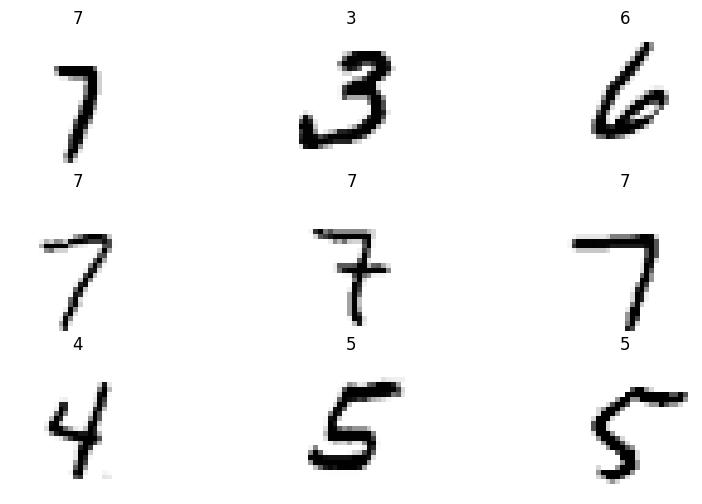

In [3]:
dls.show_batch(figsize=(10,6)) 

It appears that we have successfully created a data loader with just one line of code. To better inspect the data, we can check the dimensions of a batch of data. Let's use the `one_batch` function on the `dls` data loader object to obtain a single batch of data.

In [4]:
x,y = dls.one_batch()
print(f'Shape of X:{x.shape} \nShape of Labels:{y.shape}')

Shape of X:torch.Size([128, 1, 28, 28]) 
Shape of Labels:torch.Size([128])


Upon inspection, we can observe that the input image batch has the following dimensions:

- Batch size: 128
- Number of channels: 1 (single channel)
- Image height: 28
- Image width: 28

Additionally, the labels are represented as a vector of size 128, with one label per image.

## Creating a learner

The next step involves creating a fastai [`Learner`](https://docs.fast.ai/learner.html#learner) object using the [`vision_learner`](https://docs.fast.ai/vision.learner.html) method.

In [5]:
learn = vision_learner(
    dls=dls,  
    arch= resnet18, 
    pretrained=False, 
    metrics=accuracy, 
    n_in=1
)
print(type(learn))

<class 'fastai.learner.Learner'>


/home/aayush/miniconda3/envs/fastai/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/aayush/miniconda3/envs/fastai/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


As evident from the code snippet above, it is possible to create a fastai `Learner` in just one line of code.  Let's delve into the details of what's happening with this function. The code above is creating a fastai `Learner` object for training a model on the MNIST dataset. Here's what each parameter in the vision_learner method does:

 - `dls`: This parameter specifies the data loaders object (dls) that we previously created for the dataset.
 - `arch`: The `arch` parameter specifies the neural network architecture to be used for training. In this case, we are using [resnet18](https://pytorch.org/vision/0.8/models.html) from `torchvision.models`, which is a popular convolutional neural network architecture. fastai models are PyTorch models, so they can accept any valid PyTorch model, whether it is custom-defined or sourced from the [`torchvision`](https://pytorch.org/vision/0.8/models.html) model hub or [`timm`](https://huggingface.co/docs/timm/) library, by simply specifying the model name. This allows for flexibility in choosing different neural network architectures for training, depending on the specific requirements of the task at hand.
 - `pretrained`: This parameter indicates whether to use pre-trained weights for the neural network. In this case, False means that we are not using any pre-trained weights. 
 - `metrics`: This parameter specifies the evaluation metric(s) to be used during training. In this case, [`accuracy`](https://docs.fast.ai/metrics.html#accuracy) is used, which measures the classification accuracy. fastai provides other pre-implemented single-label classification metrics that you can use, and you can find them in the [metrics documentation](https://docs.fast.ai/metrics.html#single-label-classification).
 - `n_in` : This parameter specifies the number of input channels in the images. Since the MNIST images are grayscale with a single channel, n_in is set to 1.
 
The `type(learn)` statement is then used to print the type of the `learn` object, which should be a fastai `Learner` object.

:::{.callout-important collapse=false}
The [`vision_learner`](https://docs.fast.ai/vision.learner.html#vision_learner) class in fastai comes with a lot of "useful defaults" that have been derived from training task in hand on various datasets. For instance, it automatically selects the `AdamW` optimizer as the default optimization function, sets the learning rate to `0.001` by default and loss function as [flattened CrossEntropyLoss](https://docs.fast.ai/losses.html#crossentropylossflat). You can refer to the [documentation of vision_learner](https://docs.fast.ai/vision.learner.html#vision_learner) to explore other default settings and configurations that may be useful for your specific task.
:::

In [6]:
print(f'Optimizer function used: {learn.opt_func}')
print(f'Default learning rate: {learn.lr}')
print(f'Default loss function: {learn.loss_func}')

Optimizer function used: <function Adam at 0x7f5d84437ca0>
Default learning rate: 0.001
Default loss function: FlattenedLoss of CrossEntropyLoss()


fastai `Learner` class also comes with a lot of helpful functions. An example would be [`Learner.summary`](https://github.com/fastai/fastai/blob/master/fastai/callback/hook.py#L209) function which prints a summary of the model, optimizer and loss function.

In [7]:
learn.summary()

Sequential (Input shape: 128 x 1 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 64 x 14 x 14  
Conv2d                                    3136       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     128 x 64 x 7 x 7    
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                       

The `Learner.summary` function provides a wealth of useful information, including:

- Model layers and their trainable state
- Total number of parameters in the model, as well as the number of trainable parameters
- The optimizer used during training
- The loss function employed
- The [callbacks](https://docs.fast.ai/callback.core.html) used, which are special additional functions that run at various stages of training and inference. You can refer to the [documentation on callbacks](https://docs.fast.ai/callback.core.html)
to learn more about them.

## Training the model

fastai provides different `fit` functions in the `Learner` class that allow for flexible and convenient training of machine learning models. Here's an overview of some of the commonly used `fit` functions in Fastai:

1. [`fit`](https://docs.fast.ai/learner.html#learner.fit): This is the most commonly used `fit` function in Fastai, which trains the model using stochastic gradient descent (SGD) or its variants. It allows you to specify the number of epochs, learning rate, weight decay, and other training parameters. You can also specify callbacks for custom behavior during training.

2. [`fit_one_cycle`](https://docs.fast.ai/callback.schedule.html#learner.fit_one_cycle): This function implements the 1-cycle policy, a popular learning rate scheduling technique in deep learning. It automatically sets the learning rate, momentum, and weight decay to optimal values based on a predefined schedule. This can help improve the model's performance and speed up training.

3. [`fit_sgdr`](https://docs.fast.ai/callback.schedule.html#learner.fit_sgdr): This function implements stochastic gradient descent with restarts (SGDR), a learning rate scheduling technique that periodically resets the learning rate to a smaller value during training. This helps the model escape from local minima and find better solutions.

4. [`fit_flat_cos`](https://docs.fast.ai/callback.schedule.html#learner.fit_flat_cos): This function uses a cosine annealing learning rate schedule, where the learning rate is decreased gradually over time following a cosine curve. This helps the model converge to a better solution by avoiding overshooting.

5. [`fine_tune`](https://docs.fast.ai/callback.schedule.html#learner.fine_tune): This function fine-tunes a pre-trained model by training only the last few layers while keeping the earlier layers frozen. This is useful for transfer learning, where you start with a pre-trained model and then fine-tune it on your specific task with limited data.

These are some of the different `fit` functions available in Fastai's `Learner` class, providing flexibility and convenience for training machine learning models with various techniques and strategies.

We will use `fit_one_cycle` function for our training example and train for five epochs. 

In [8]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.164690,0.133020,0.962214,00:48
1,0.097386,0.152779,0.960214,00:47
2,0.059235,0.056804,0.982500,00:45
3,0.027329,0.030058,0.991500,00:46
4,0.012300,0.023299,0.993071,00:47


As we can see above, the `fit_one_cycle` function in fastai provides a progress bar(while training, not shown above) and displays statistics in a neat table after every epoch, which includes:

- Train and validation loss
- The defined metric, in this case `accuracy` on the validation set 
- Time taken to run that particular epoch

## Saving the model

We can save the model weights, optimizer state and `DataLoaders` transform by using `export` function. 

:::{.callout-note}
We will explore additional techniques for extracting model weights beyond what has been covered so far in later chapters.
:::

In [22]:
learn.export(fname="mnist_highlevel.pkl")

## Loading the model

To load the model we can use `load_learner` function.

In [50]:
learn = load_learner(
    fname=dPath/"mnist_highlevel.pkl", 
    cpu=True
)

`load_learner` function takes following arguments - 

-  `fname` - The path of the saved learner object
- `cpu` - This parameter is set to `True`, indicating that the learner object should be loaded onto the CPU for inference.

## Performing inference

To perform inference, we will first obtain the file path of an image from our testing folder.

In [47]:
fname = (dPath/"testing/4").ls()[0]
print(f'Sample file path: {fname}')
Image.open(fname)

Sample file path: ../data/mnist_png/testing/4/1010.png


We have selected an image of the digit four from our test dataset. To perform inference we will use the [`predict`](https://docs.fast.ai/learner.html#learner.predict) method from `Learner` class.

In [48]:
preds = learn.predict(fname)
print(preds)

('4', TensorBase(4), TensorBase([1.6044e-06, 2.5403e-06, 2.2100e-06, 2.8801e-07, 9.9986e-01,
            4.1187e-07, 1.7771e-05, 2.4048e-05, 5.0337e-07, 9.5490e-05]))


The prediction results include the following information:

-  decoded model label: `4`. 
- The index with highest probability: `TensorBase(4)`. 
- Raw probabilities of each class in the vocabulary.

## Conclusion

In this chapter, we delved into the intricacies of building a model pipeline using `fastai`'s high-level API. We covered the essential steps of data preparation, model training, and inference, and demonstrated how the rich functionality of `fastai`'s high-level API can streamline these processes. We also explored the convenience of its abstractions for tasks like data augmentation, model selection, and model interpretation using the MNIST dataset as an example. In the next chapter, we will continue our journey by exploring similar concepts but with a focus on `fastai`'s mid-level API.